# Feature selection
Feature selection is the process of selecting a subset of features that are most relevant for model construction which aid in creating an accurate predictive model. There are a wide range of feature selection algorithms, and these mainly fall in one of the three categories:

Filter method– selects features by assigning a score to them using some statistical measure. Wrapper method– evaluates different subset of features, and determines the best subset. Embedded method – This method figures out which of the features give the best accuracy while the model is being trained.

In our model, we will use filter method utilising the random.forest.importance function. The random.forest.importance function rates the importance of each feature in the classification of the outcome, i.e. class variable. The function returns a data frame containing the name of each attribute and the importance value based on the mean decrease in accuracy.

In [11]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

        Importance
EMA21     2.143763
RSI21     2.246916
EMA63     2.282470
%K21      2.334897
%D21      2.447479
MA21      2.454393
MA63      2.454992
MOM21     2.522991
%K63      2.659367
EMA252    2.774269
MA252     3.106138
ROC21     3.185368
RSI252    3.507886
%D63      3.666679
%K252     9.167479
RSI63    11.151801
%D252    11.400691
ROC63    14.600115
MOM63    15.892306


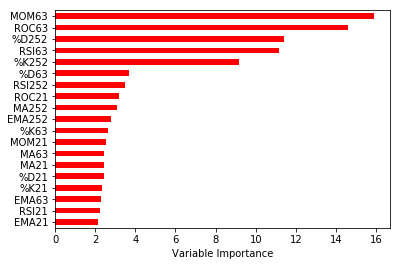

In [12]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Splitting
After creating models for unseen data, we will check their accuracy thanks to statistical methods. We evaluate the accuracy of the best model on actual unseen data to have the estimation more concrete.
Meaning that we will use the algorithm on the training set and use the model on the test set afterwards for validation. We split the dataset into 80% training set and 20% test set.

In [16]:
X_1=datasub.drop(['signal'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.2, random_state=1)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
X_test_1=X_test.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(4805, 26) (4805,)
(1202, 26) (1202,)


# Modeling
In order to know which algorithm technic is the best for our strategy, we evaluate 5 non linear different methods:
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Support Vector Machines (SVM)
- Random Forest (RF)
- Gaussian Naïve Bayes (NB)

To ensure the comparatibility of the results (use the same data splits), the random number (seed = 1) is reset before each run.

In [17]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.957338 (0.004066)
CART: 0.949218 (0.009593)
SVM: 0.932570 (0.008892)
RF: 0.966915 (0.009720)
NB: 0.830599 (0.012240)


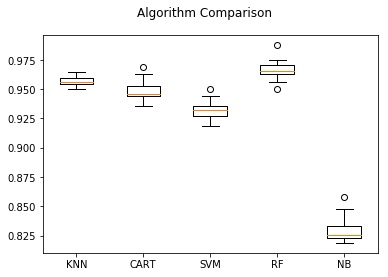

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()